0
Early stopping at epoch 306


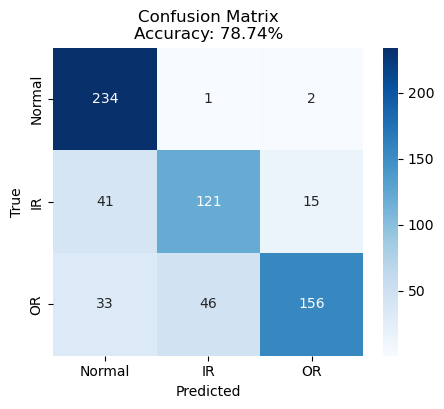

 - Model accuracy: 78.74%


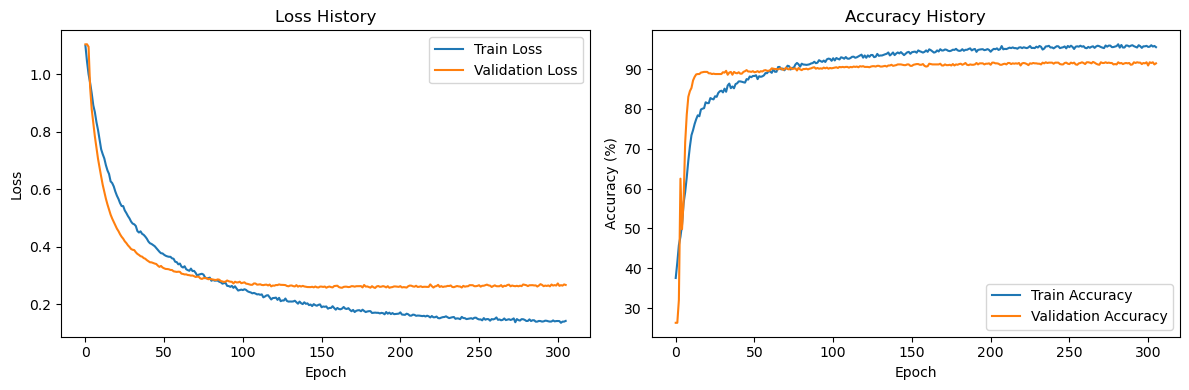

0
Early stopping at epoch 327


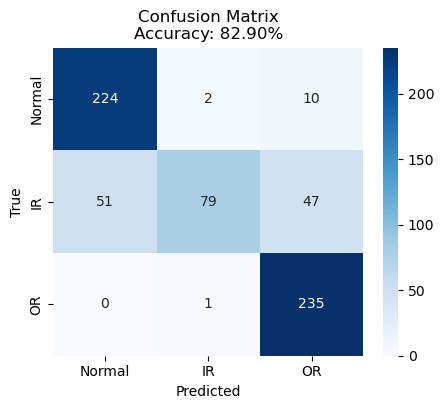

 - Model accuracy: 82.90%


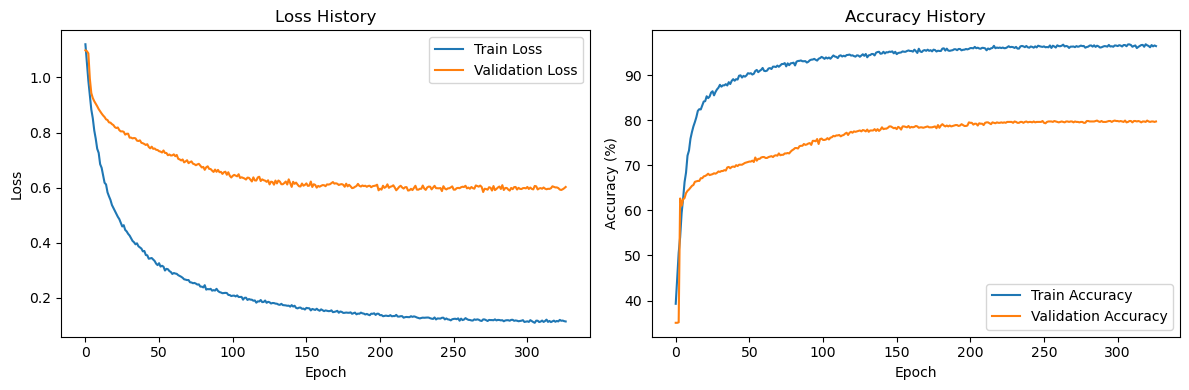

0
Early stopping at epoch 97


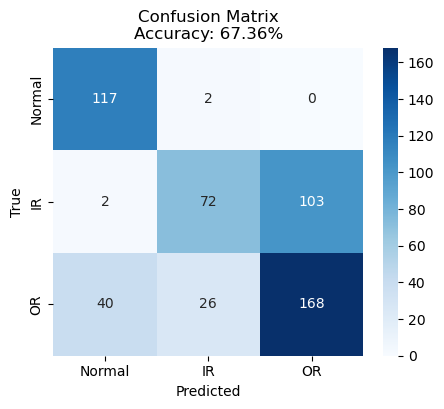

 - Model accuracy: 67.36%


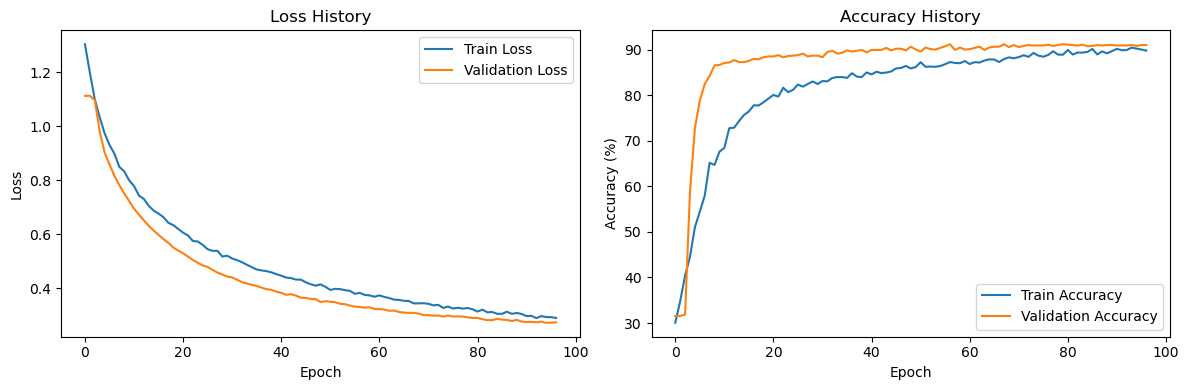

0
Early stopping at epoch 133


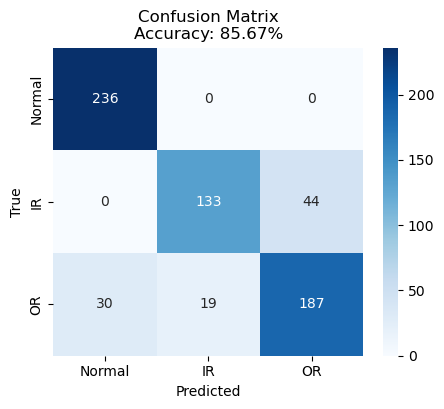

 - Model accuracy: 85.67%


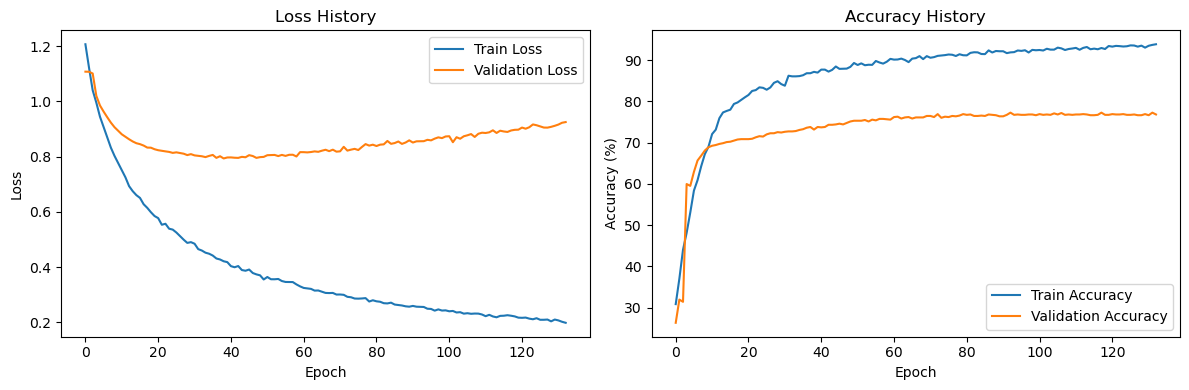

0
Early stopping at epoch 256


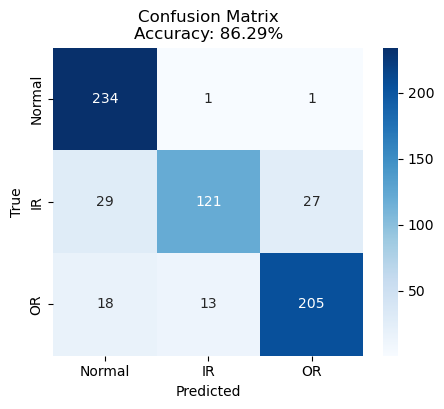

 - Model accuracy: 86.29%


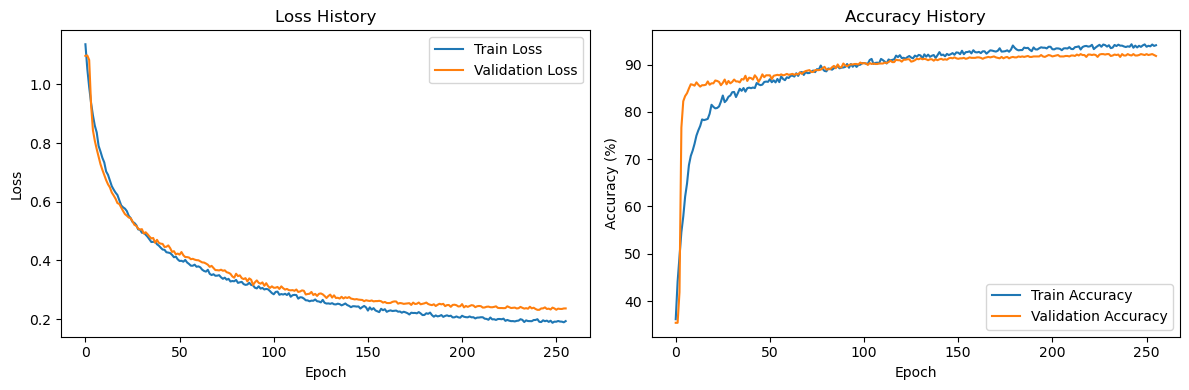

0
Early stopping at epoch 285


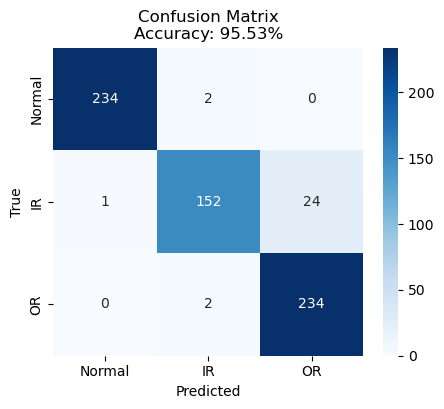

 - Model accuracy: 95.53%


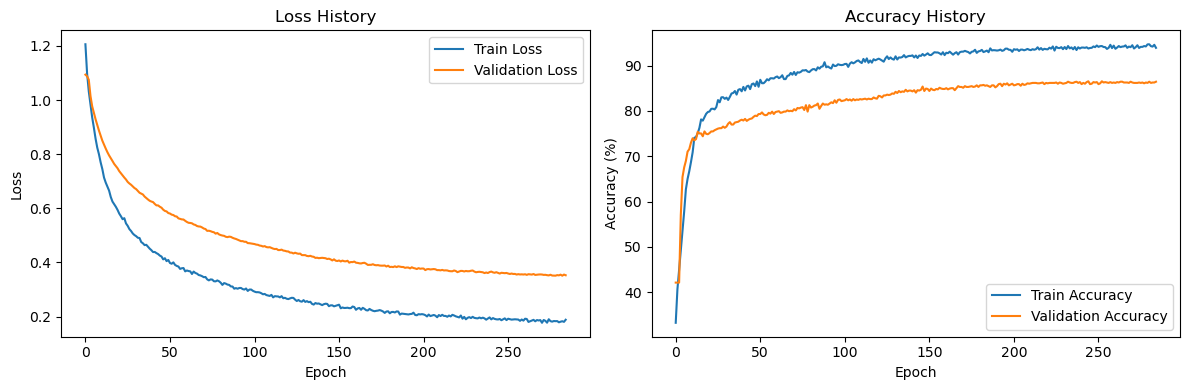

0
Early stopping at epoch 170


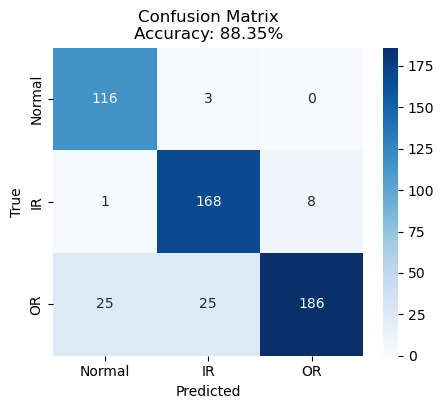

 - Model accuracy: 88.35%


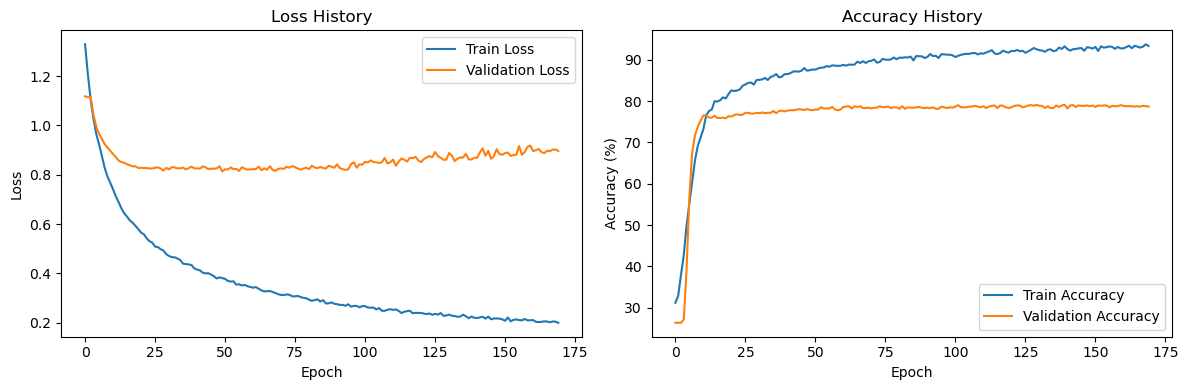

0
Early stopping at epoch 166


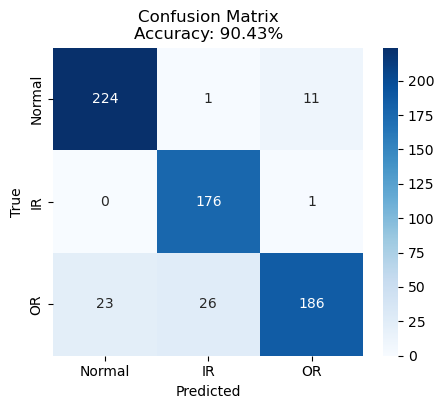

 - Model accuracy: 90.43%


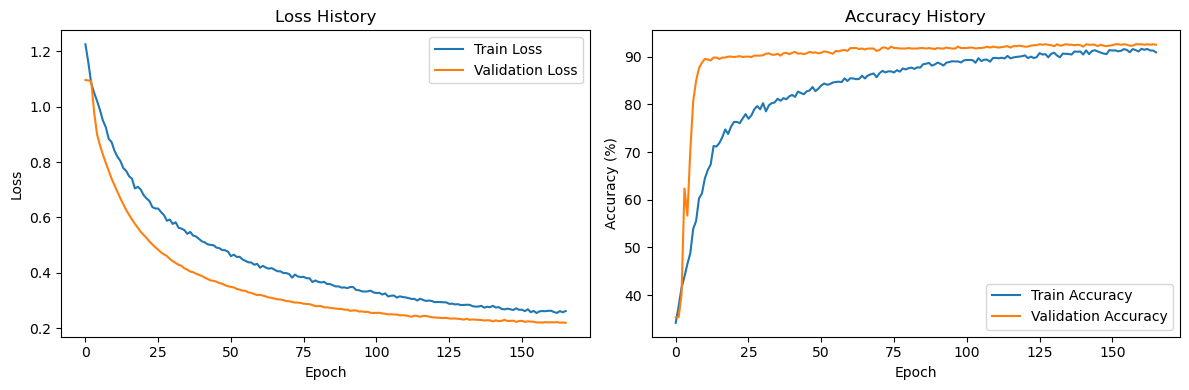

0
Early stopping at epoch 321


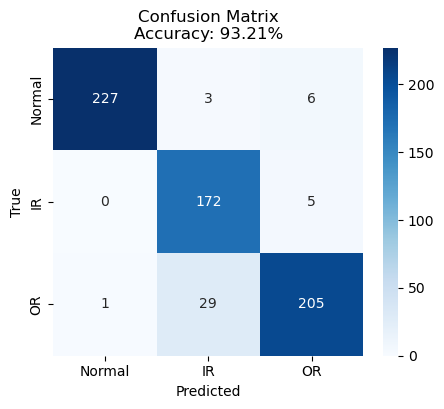

 - Model accuracy: 93.21%


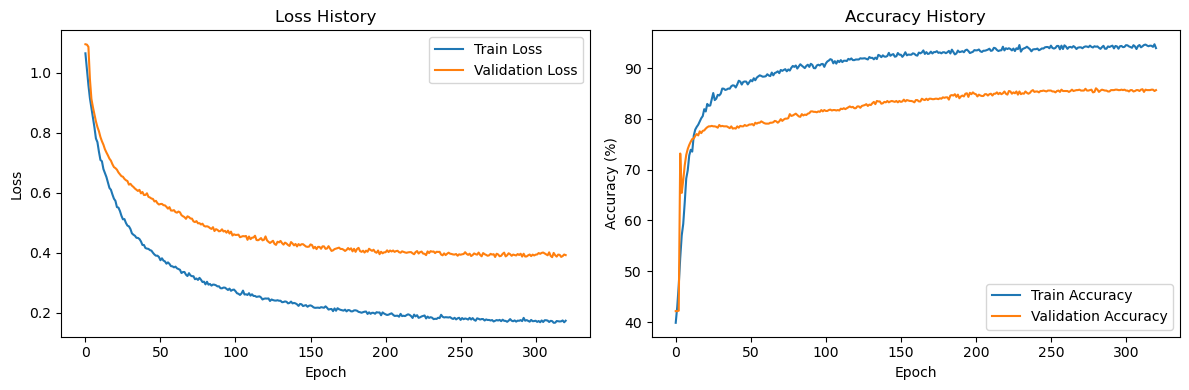

0
Early stopping at epoch 264


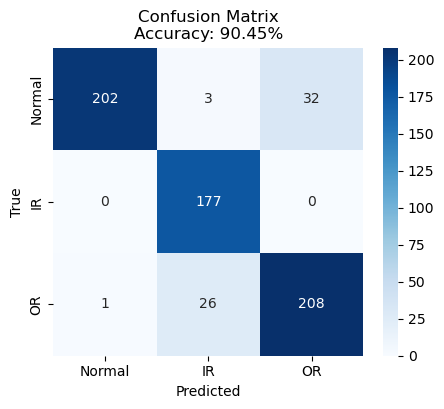

 - Model accuracy: 90.45%


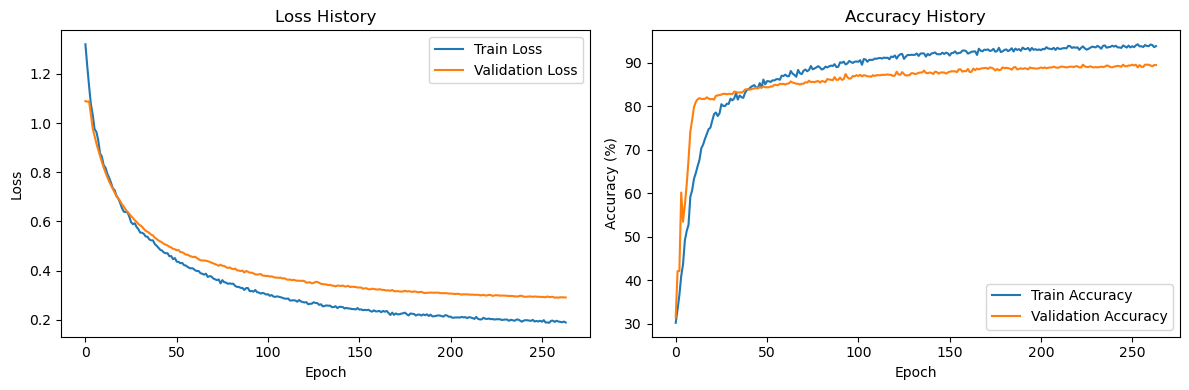

0
Early stopping at epoch 284


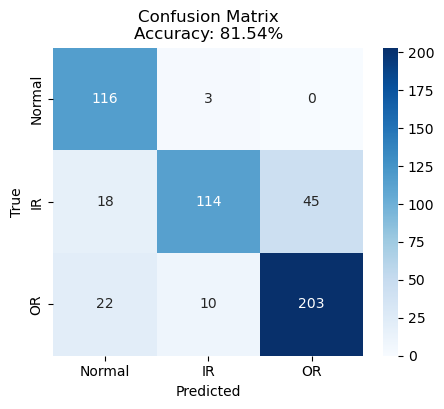

 - Model accuracy: 81.54%


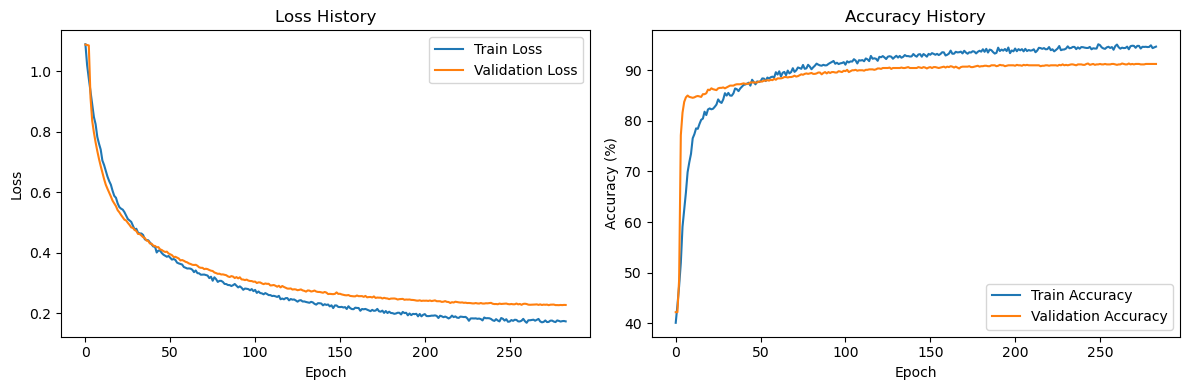

0
Early stopping at epoch 323


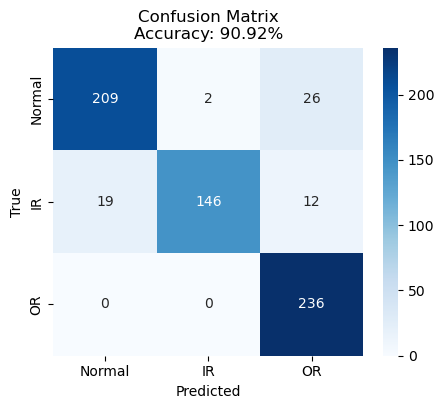

 - Model accuracy: 90.92%


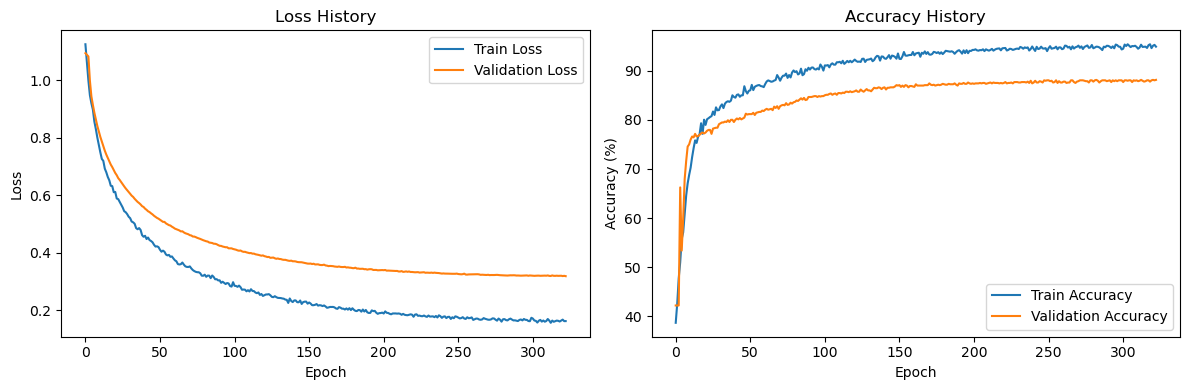

0
Early stopping at epoch 231


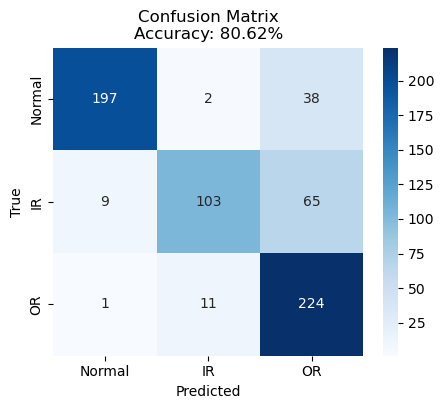

 - Model accuracy: 80.62%


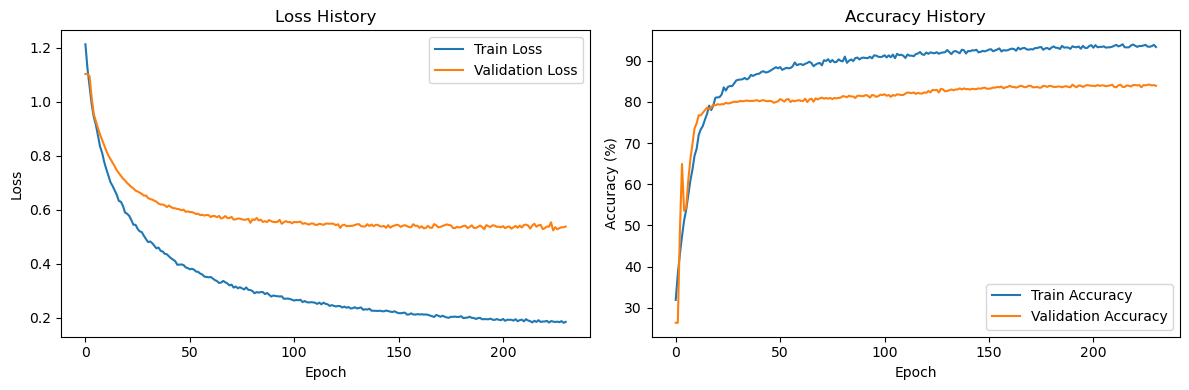

0
Early stopping at epoch 304


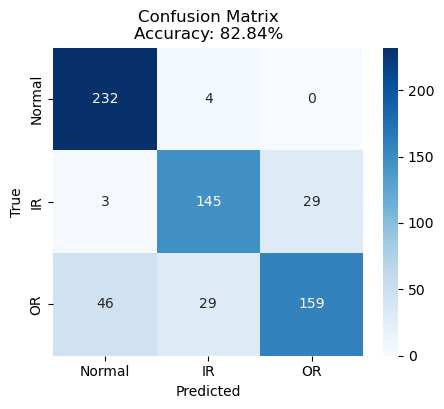

 - Model accuracy: 82.84%


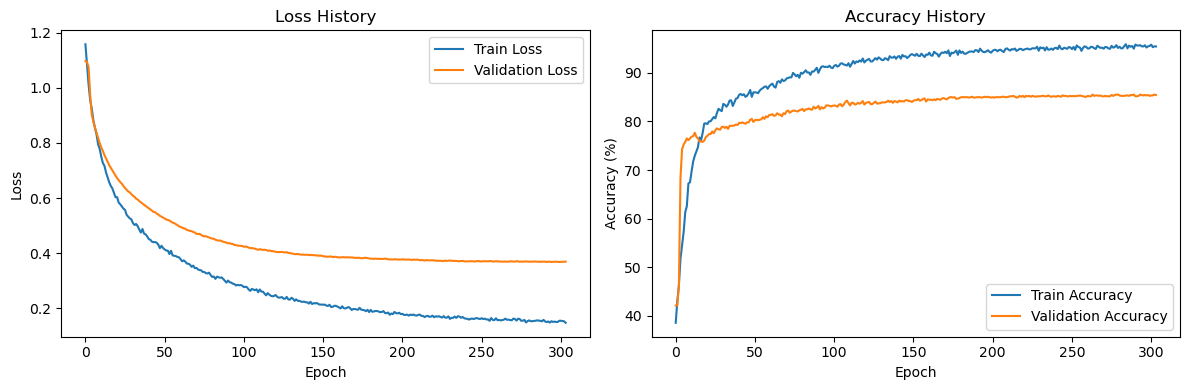

0
Early stopping at epoch 129


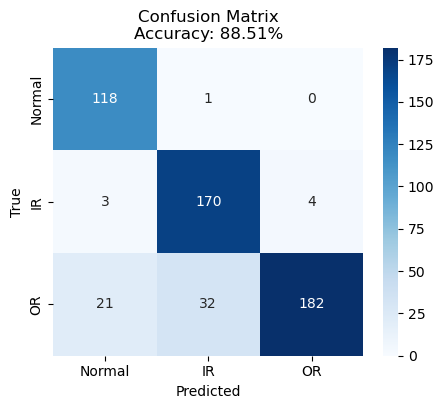

 - Model accuracy: 88.51%


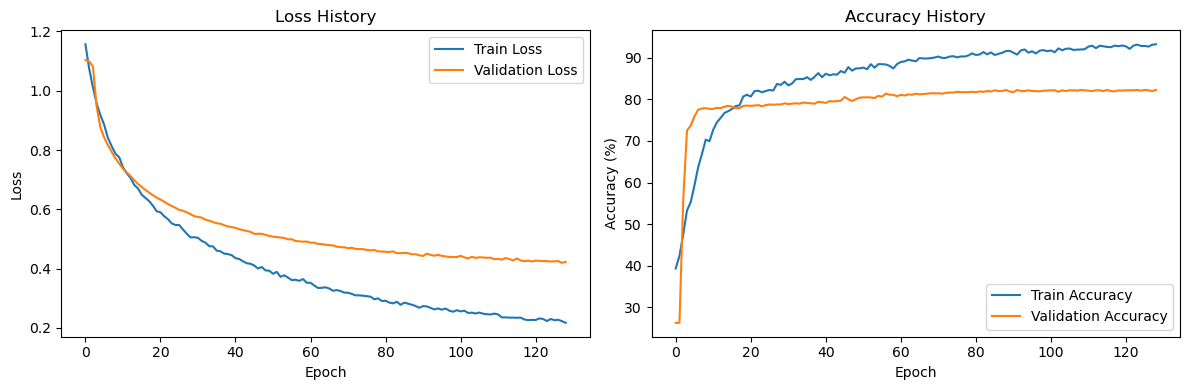

0
Early stopping at epoch 252


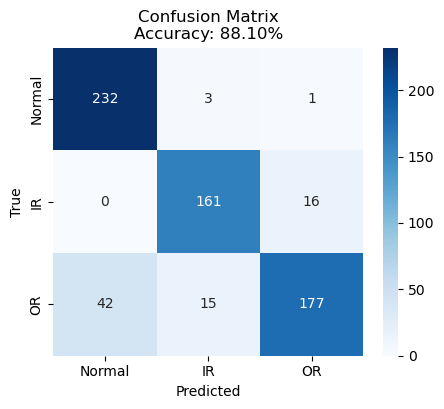

 - Model accuracy: 88.10%


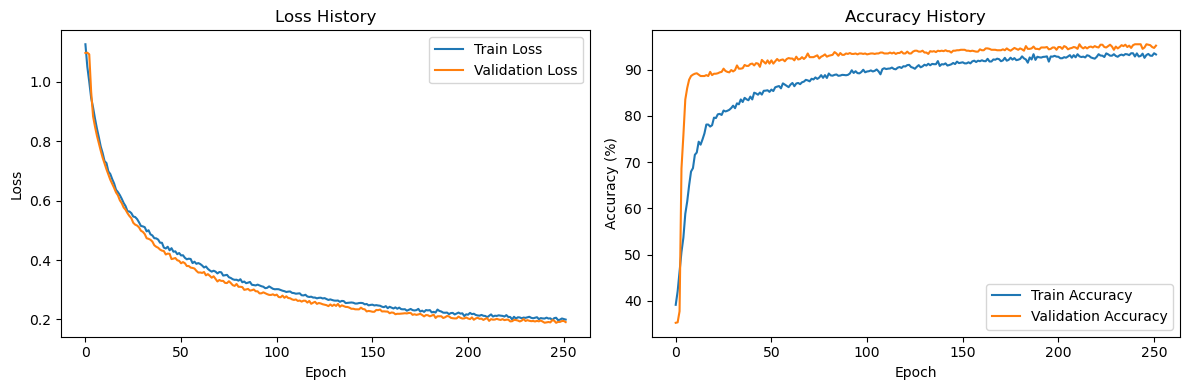

0
Early stopping at epoch 146


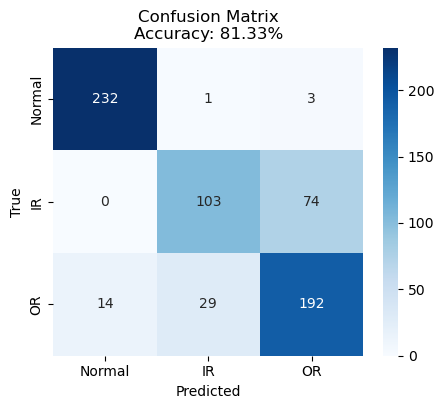

 - Model accuracy: 81.33%


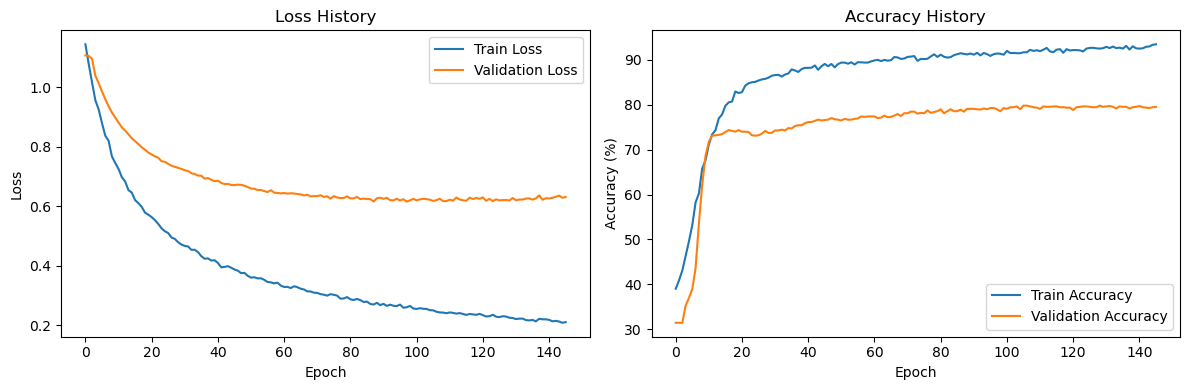

0
Early stopping at epoch 282


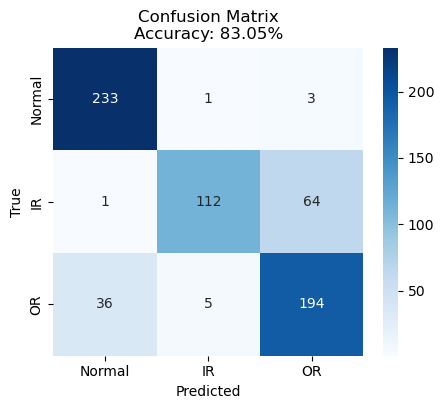

 - Model accuracy: 83.05%


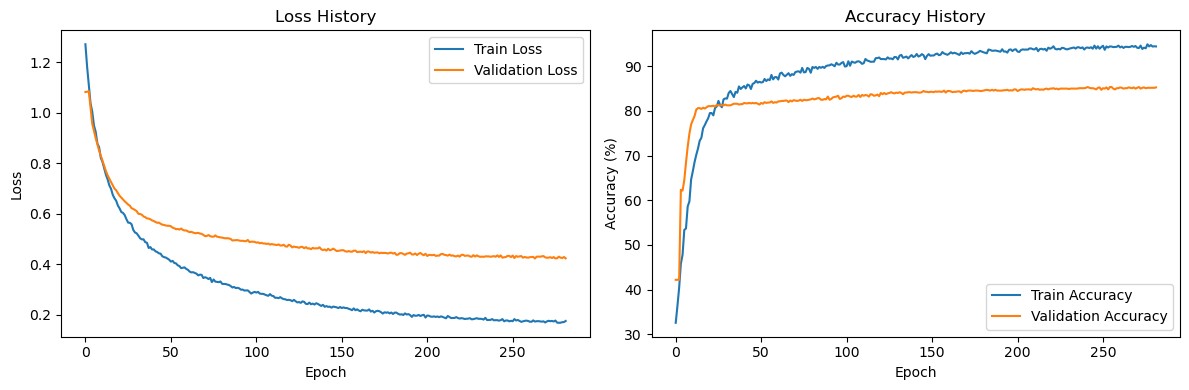

0
Early stopping at epoch 346


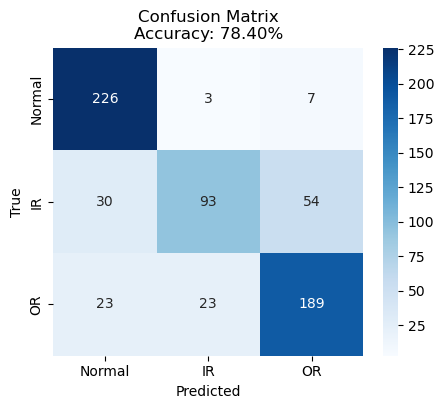

 - Model accuracy: 78.40%


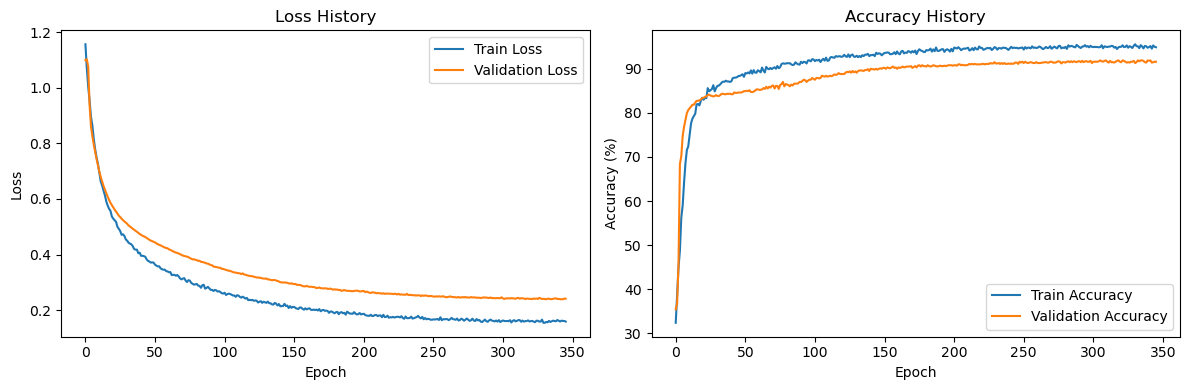

0
Early stopping at epoch 375


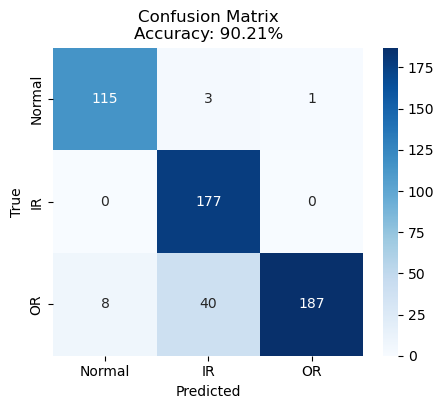

 - Model accuracy: 90.21%


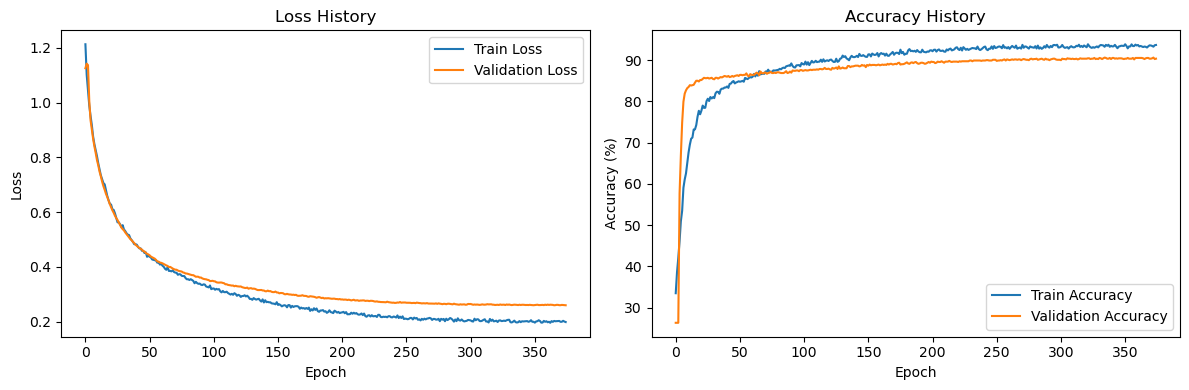

0
Early stopping at epoch 72


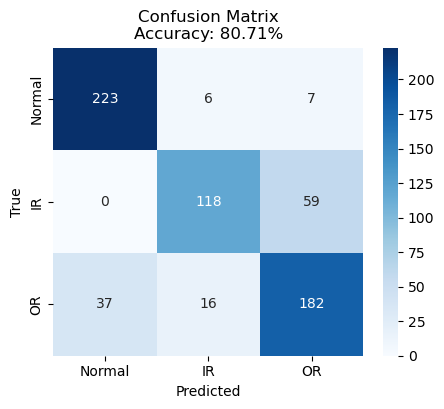

 - Model accuracy: 80.71%


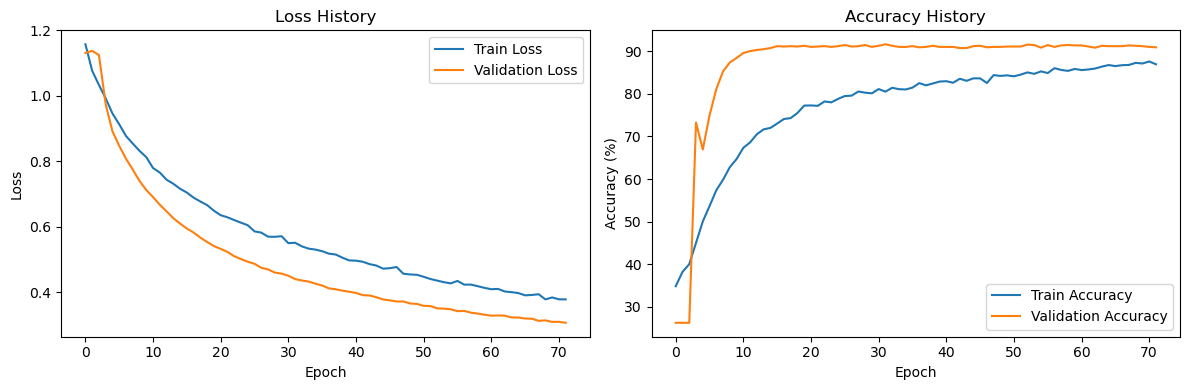

0
Early stopping at epoch 282


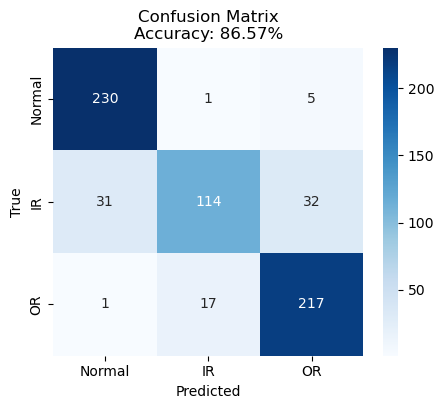

 - Model accuracy: 86.57%


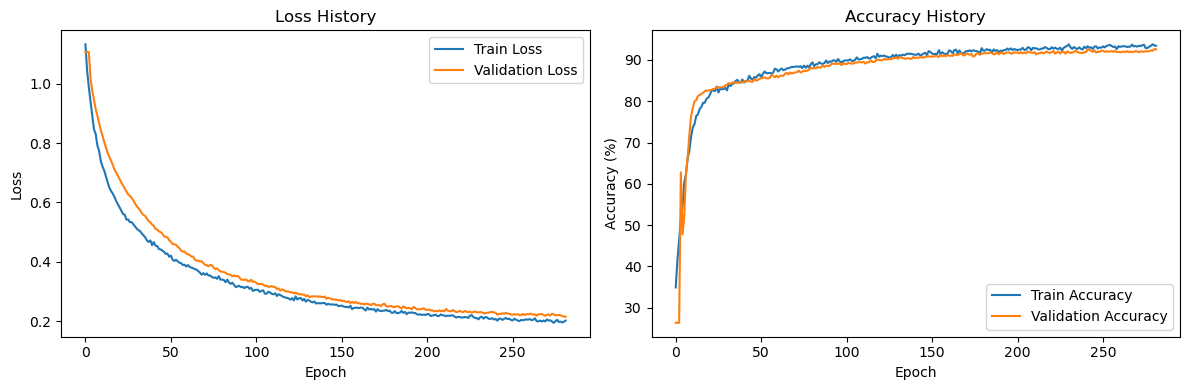

0
Early stopping at epoch 309


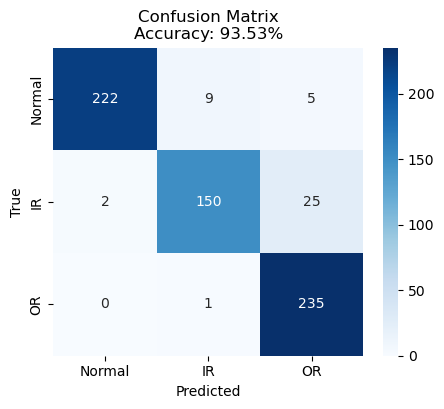

 - Model accuracy: 93.53%


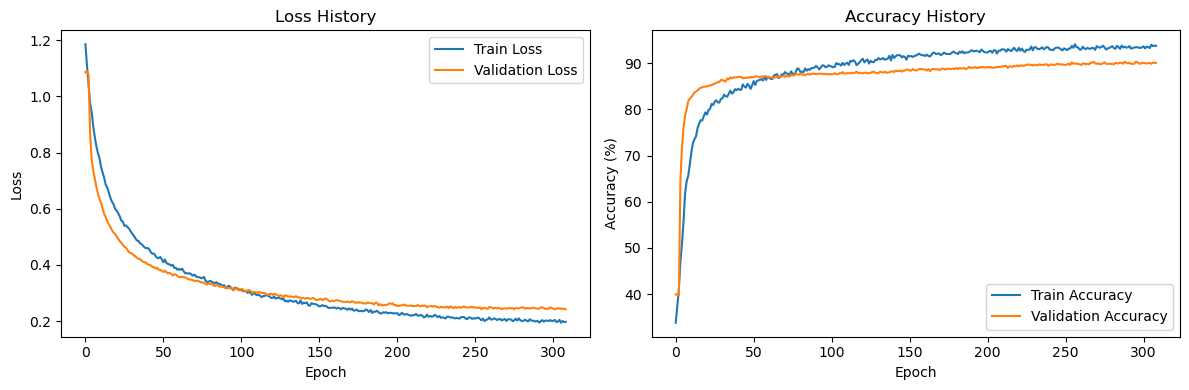

0
Early stopping at epoch 121


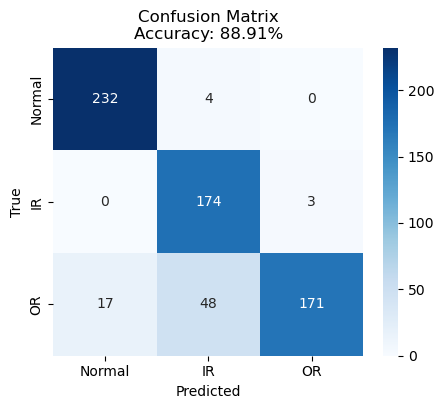

 - Model accuracy: 88.91%


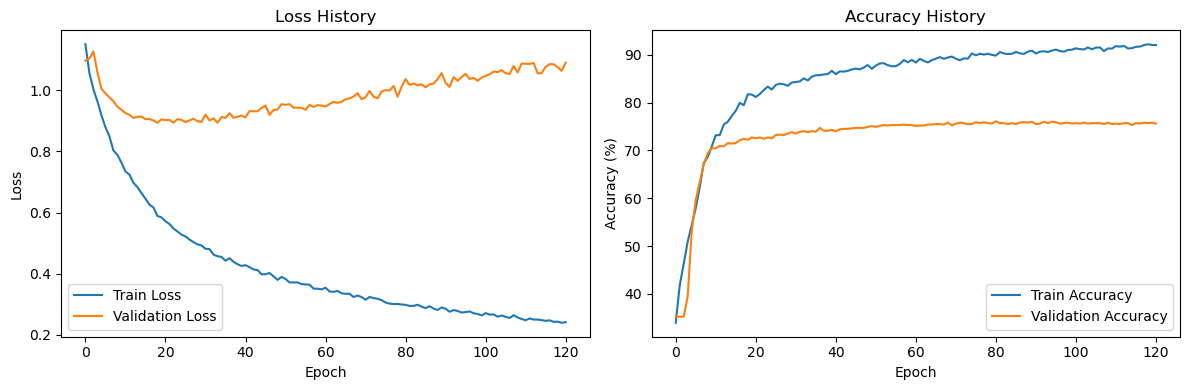

0
Early stopping at epoch 349


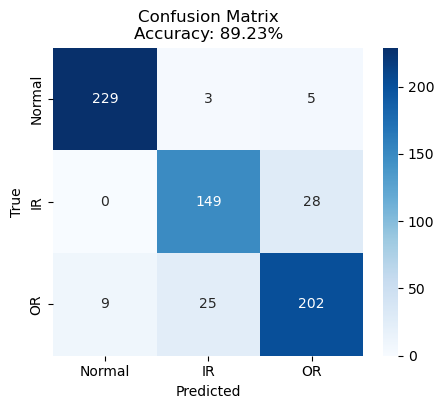

 - Model accuracy: 89.23%


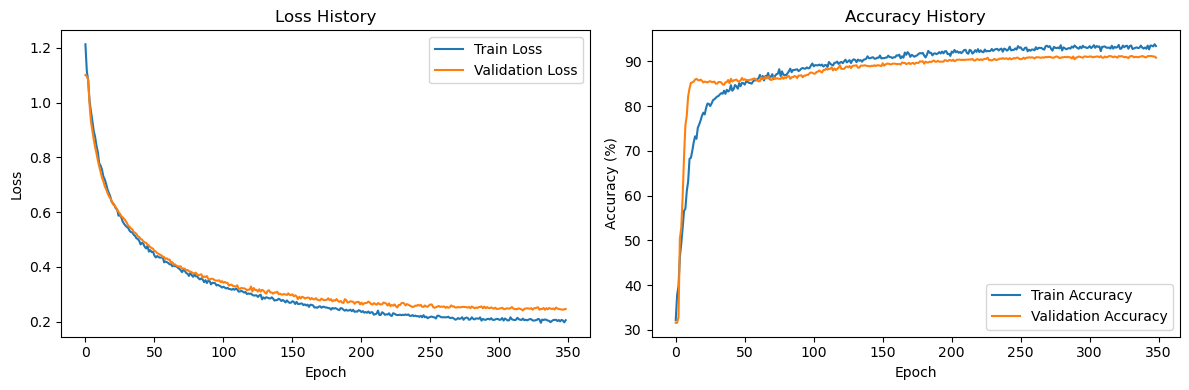

0
Early stopping at epoch 63


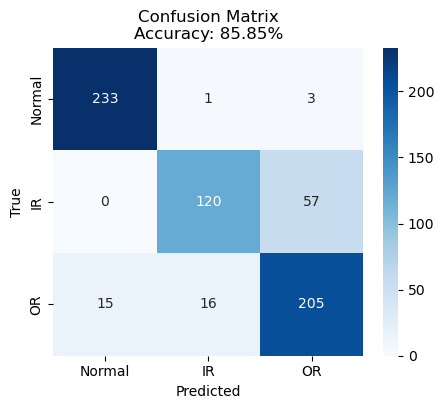

 - Model accuracy: 85.85%


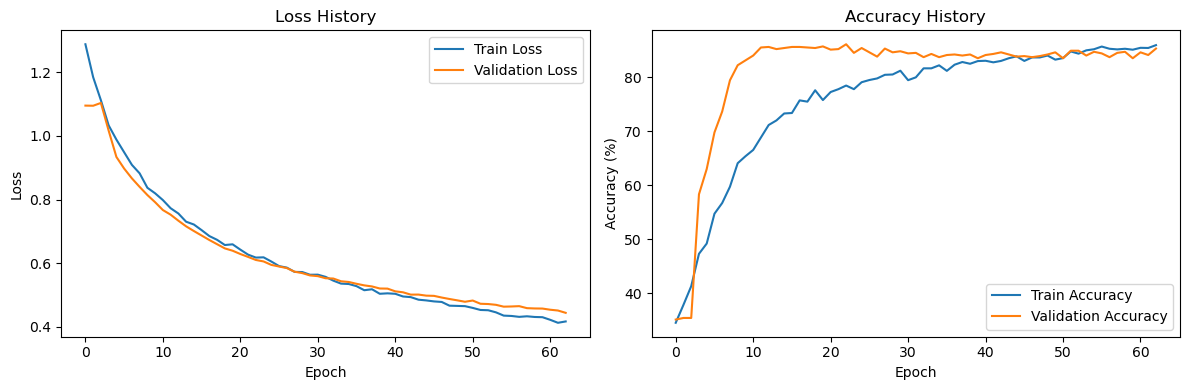

0
Early stopping at epoch 158


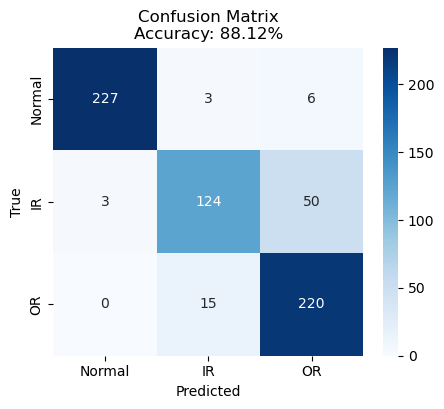

 - Model accuracy: 88.12%


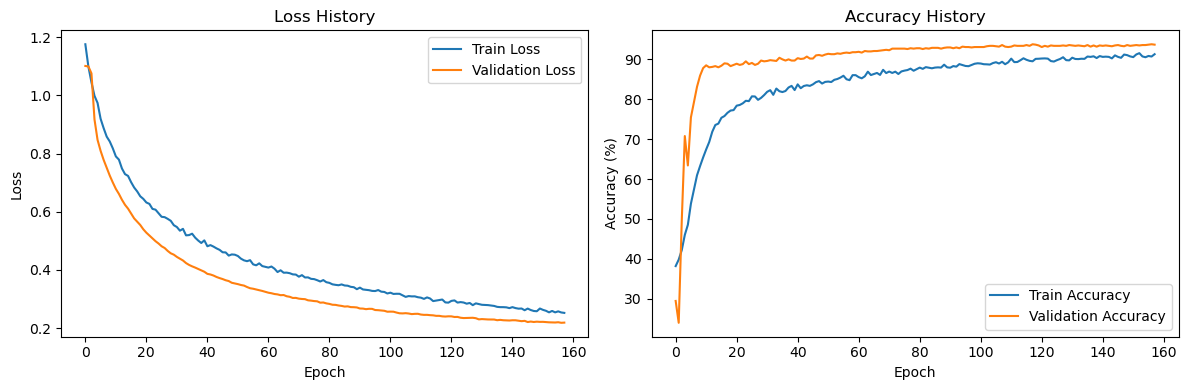

0
Early stopping at epoch 361


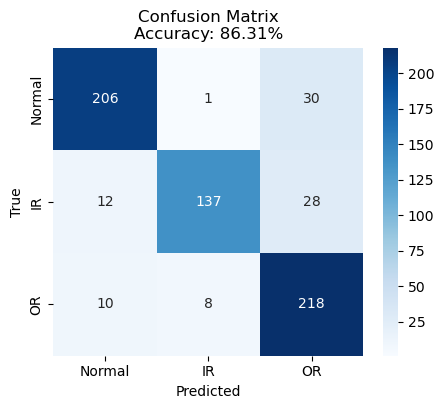

 - Model accuracy: 86.31%


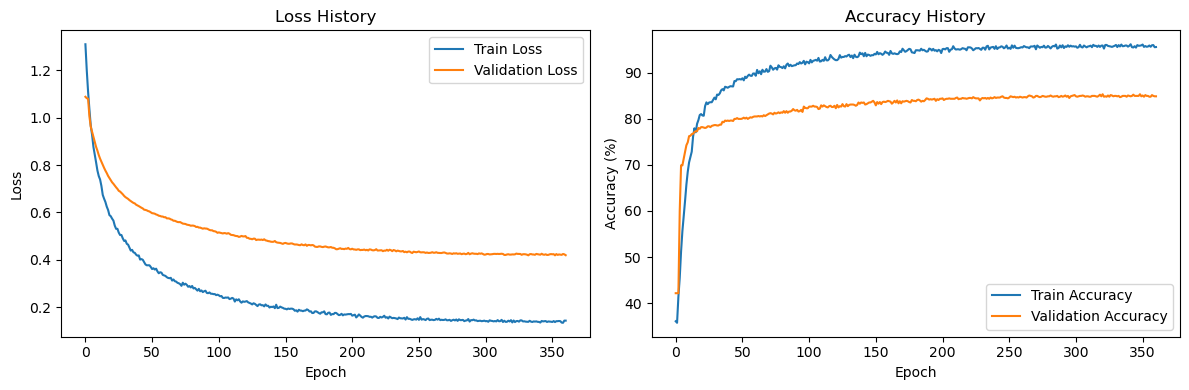

0
Early stopping at epoch 273


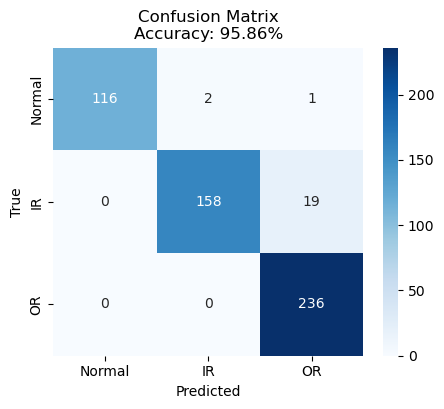

 - Model accuracy: 95.86%


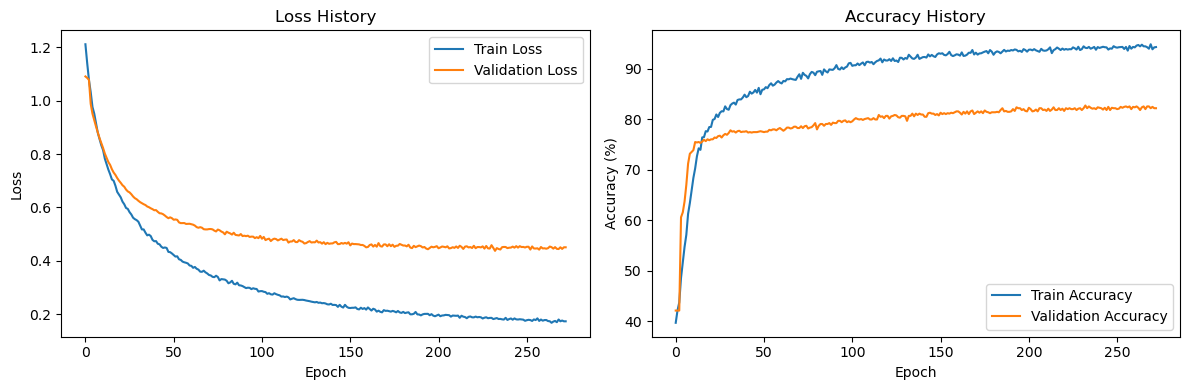

0
Early stopping at epoch 58


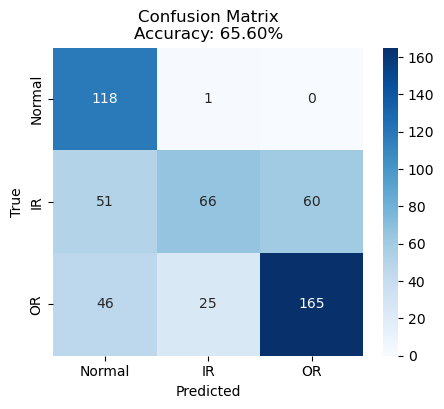

 - Model accuracy: 65.60%


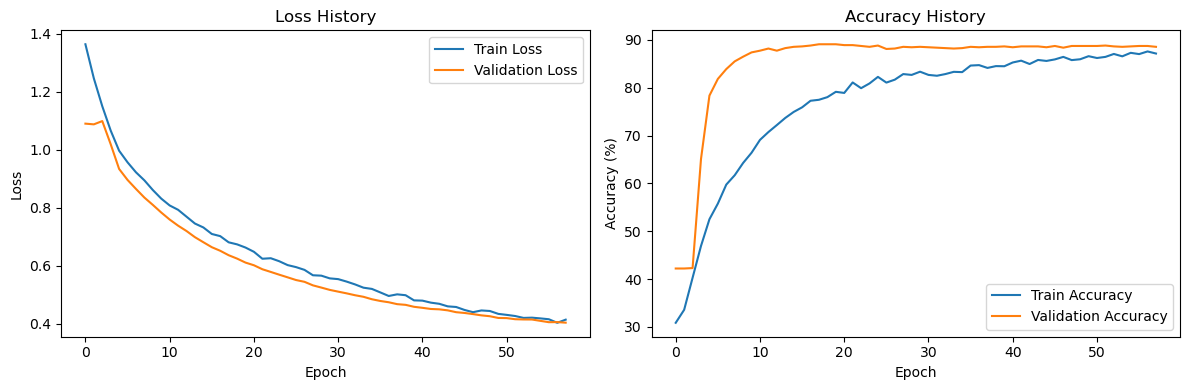

Mean accuracy: 0.8550398084172617
Std accuracy: 0.06860943452470383


In [1]:
import cfg
from src import data_loader as data_loader, models, trainer, evaluate, preprocessing
from torchinfo import summary
import torch.nn as nn
import torch.optim as optim
import numpy as np

accuracy_list = []

for i in range(30):
    trainer.set_seed(i)

    X_train, Y_train, X_val, Y_val, X_test, Y_test, test_files, len_processed = data_loader.data_import(cfg, 500)

    scaler = preprocessing.DataScaler(method='simple_scale', scale_factor=1.0)
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    train_loader, val_loader, test_loader = data_loader.create_dataloaders(X_train, Y_train, X_val, Y_val,X_test, Y_test, cfg, len_processed)

    model = models.Deeper1DCNN(1, cfg.NUM_CLASSES)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr= cfg.LEARNING_RATE) #weight_decay=1e-4
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max= cfg.NUM_EPOCHS, eta_min=cfg.LEARNING_RATE *1e-2)

    trained_model, history = trainer.train_model(model, train_loader, val_loader, criterion, optimizer, 'test.pth', scheduler, num_epochs=cfg.NUM_EPOCHS, device=cfg.DEVICE)

    accuracy = evaluate.plot_confusion_matrix(trained_model, test_loader, 'cpu', cfg.CLASS_NAMES)
    accuracy_list.append(accuracy)
    evaluate.plot_history(history)

print('='*20)
print('Mean accuracy:', np.mean(accuracy_list))
print('Std accuracy:', np.std(accuracy_list))